In [9]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
Pandas version: 3.0.1


In [10]:
# Cell 2: Load the data
df = pd.read_csv('../data/raw/student_data.csv')

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (500, 14)

First few rows:


,student_id,attendance,exam1,exam2,exam3,exam4,performance_trend,study_hours_per_week,sleep_hours_per_night,avg_assignment_delay_days,engagement_score,actual_risk,avg_exam_score,exam_volatility
0,STU0001,82.9,74.4,81.6,81.4,85.0,stable,15.4,6.7,0.2,7.5,Low,80.600,4.451217
1,STU0002,59.1,53.1,53.7,52.2,52.4,stable,5.0,6.6,0.7,8.2,High,52.850,0.685565
2,STU0003,86.7,66.6,74.3,71.0,66.4,stable,11.8,7.3,0.7,8.6,Low,69.575,3.798574
3,STU0004,88.1,51.0,59.9,61.2,49.7,declining,7.3,8.7,0.4,5.9,Medium,55.450,5.936610
4,STU0005,58.6,83.3,86.9,88.9,90.2,improving,18.3,6.6,0.1,7.7,Low,87.325,3.007075


In [11]:
# Cell 3: Data Information
print("Dataset Info:")
print(df.info())

print("\n" + "="*50 + "\n")
print("Summary Statistics:")
df.describe()

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 500 non-null    str    
 1   attendance                 500 non-null    float64
 2   exam1                      500 non-null    float64
 3   exam2                      500 non-null    float64
 4   exam3                      500 non-null    float64
 5   exam4                      500 non-null    float64
 6   performance_trend          500 non-null    str    
 7   study_hours_per_week       500 non-null    float64
 8   sleep_hours_per_night      500 non-null    float64
 9   avg_assignment_delay_days  500 non-null    float64
 10  engagement_score           500 non-null    float64
 11  actual_risk                500 non-null    str    
 12  avg_exam_score             500 non-null    float64
 13  exam_volatility            500 non-null    floa

,attendance,exam1,exam2,exam3,exam4,study_hours_per_week,sleep_hours_per_night,avg_assignment_delay_days,engagement_score,avg_exam_score,exam_volatility
count,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,84.25300,74.896000,75.366400,75.32720,75.173200,20.542400,7.361200,0.968400,6.902400,75.190700,4.804765
std,13.33973,11.398145,11.424822,11.85334,12.629663,7.985235,1.401922,0.991912,1.937095,10.945166,2.000708
min,41.30000,45.700000,41.700000,37.50000,34.000000,5.000000,4.000000,0.000000,1.000000,41.400000,0.000000
25%,75.17500,66.600000,67.375000,68.20000,66.500000,15.000000,6.400000,0.300000,5.700000,67.400000,3.402817
50%,87.10000,74.950000,75.200000,75.70000,75.500000,20.300000,7.300000,0.600000,6.900000,74.625000,4.751491
75%,95.82500,82.450000,83.400000,83.30000,83.825000,26.125000,8.325000,1.400000,8.400000,83.262500,6.112529
max,100.00000,100.000000,100.000000,100.00000,100.000000,40.000000,11.600000,5.900000,10.000000,100.000000,12.259554


Missing values in each column:
student_id                   0
attendance                   0
exam1                        0
exam2                        0
exam3                        0
exam4                        0
performance_trend            0
study_hours_per_week         0
sleep_hours_per_night        0
avg_assignment_delay_days    0
engagement_score             0
actual_risk                  0
avg_exam_score               0
exam_volatility              0
dtype: int64


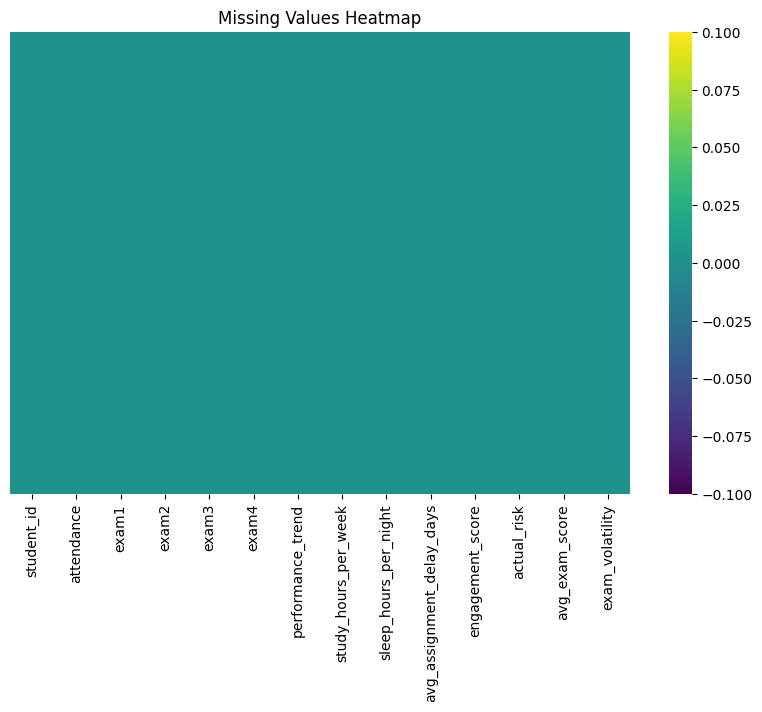

In [12]:
# Cell 4: Check missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

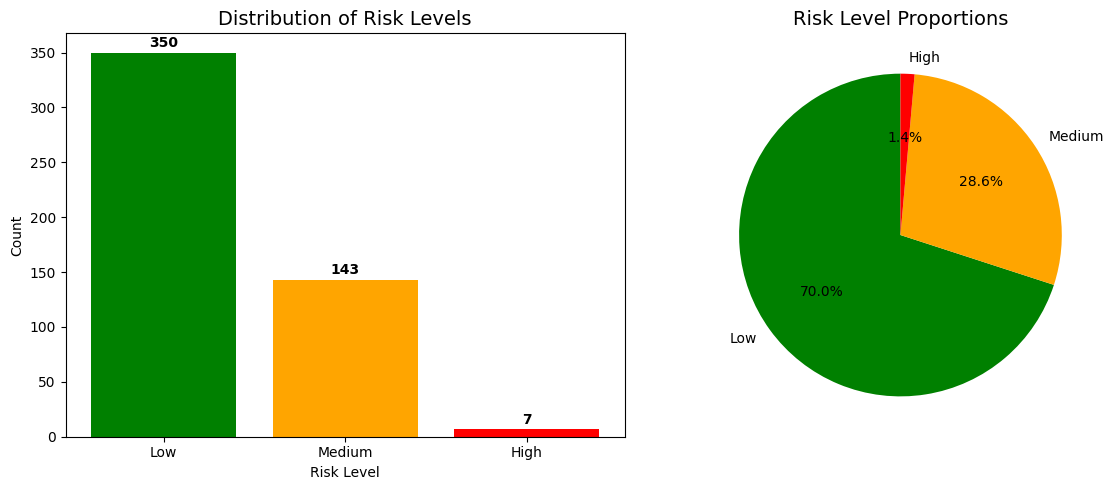


Risk Distribution:
actual_risk
Low       350
Medium    143
High        7
Name: count, dtype: int64

Percentages:
actual_risk
Low       70.0
Medium    28.6
High       1.4
Name: count, dtype: float64


In [13]:
# Cell 5: Risk Distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
risk_counts = df['actual_risk'].value_counts()
axes[0].bar(risk_counts.index, risk_counts.values, color=['green', 'orange', 'red'])
axes[0].set_title('Distribution of Risk Levels', fontsize=14)
axes[0].set_xlabel('Risk Level')
axes[0].set_ylabel('Count')

# Add value labels on bars
for i, v in enumerate(risk_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%',
           colors=['green', 'orange', 'red'], startangle=90)
axes[1].set_title('Risk Level Proportions', fontsize=14)

plt.tight_layout()
plt.show()

print(f"\nRisk Distribution:")
print(risk_counts)
print(f"\nPercentages:")
print(risk_counts / len(df) * 100)

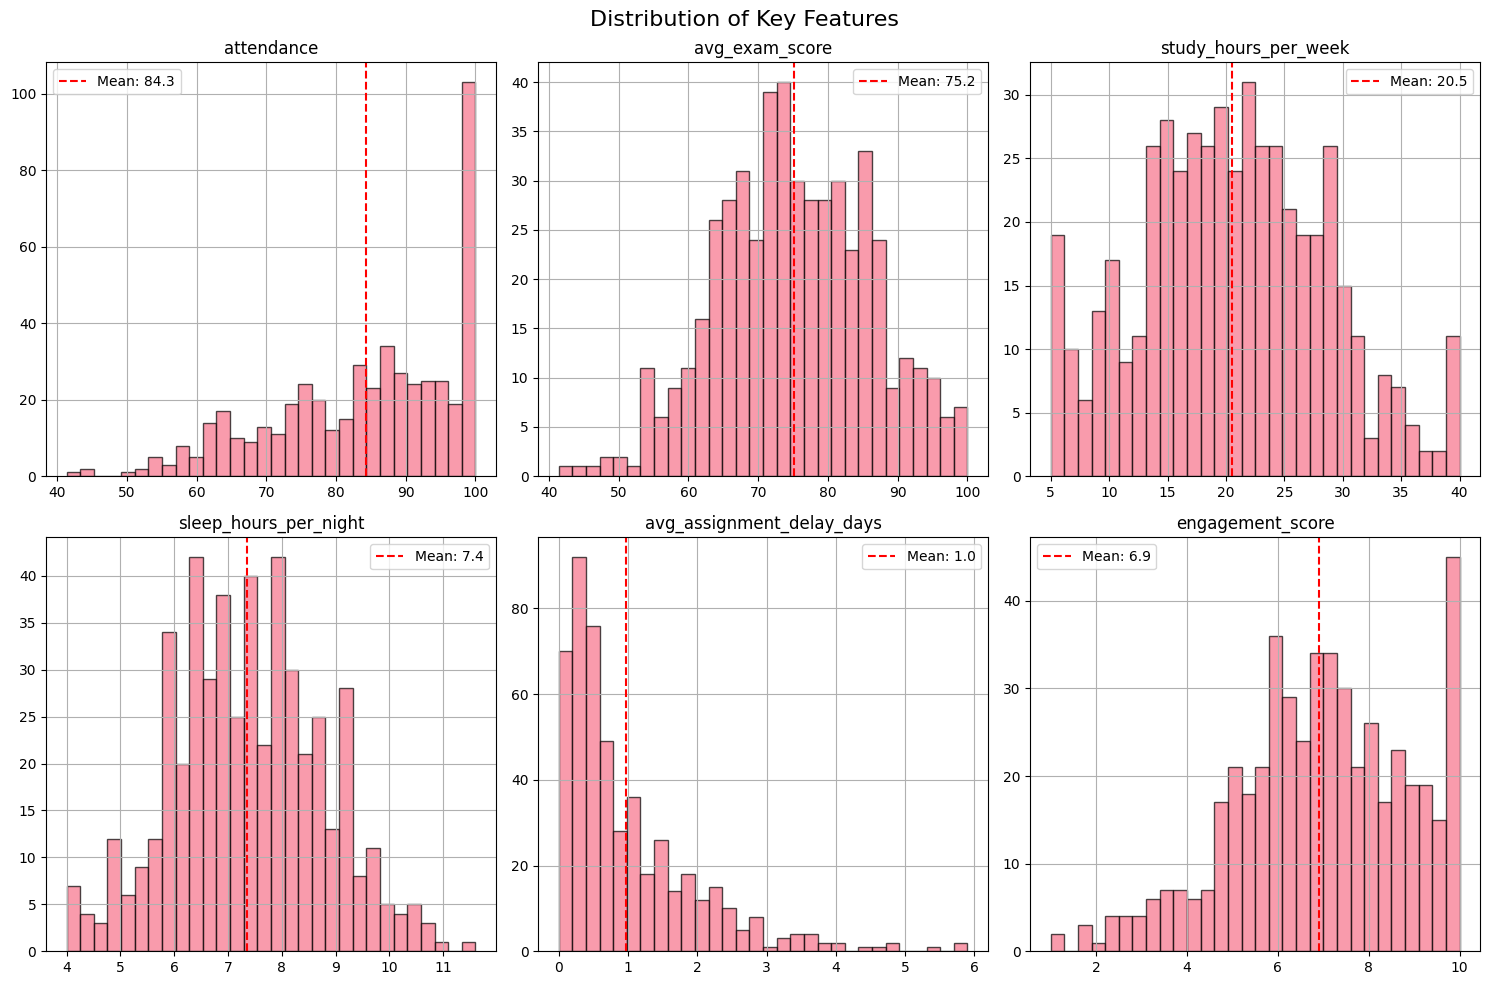

In [14]:
# Cell 6: Distribution of Key Features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Key Features', fontsize=16)

features = ['attendance', 'avg_exam_score', 'study_hours_per_week', 
            'sleep_hours_per_night', 'avg_assignment_delay_days', 'engagement_score']

for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3
    df[feature].hist(ax=axes[row, col], bins=30, edgecolor='black', alpha=0.7)
    axes[row, col].set_title(feature)
    axes[row, col].axvline(df[feature].mean(), color='red', linestyle='--', 
                           label=f'Mean: {df[feature].mean():.1f}')
    axes[row, col].legend()

plt.tight_layout()
plt.show()

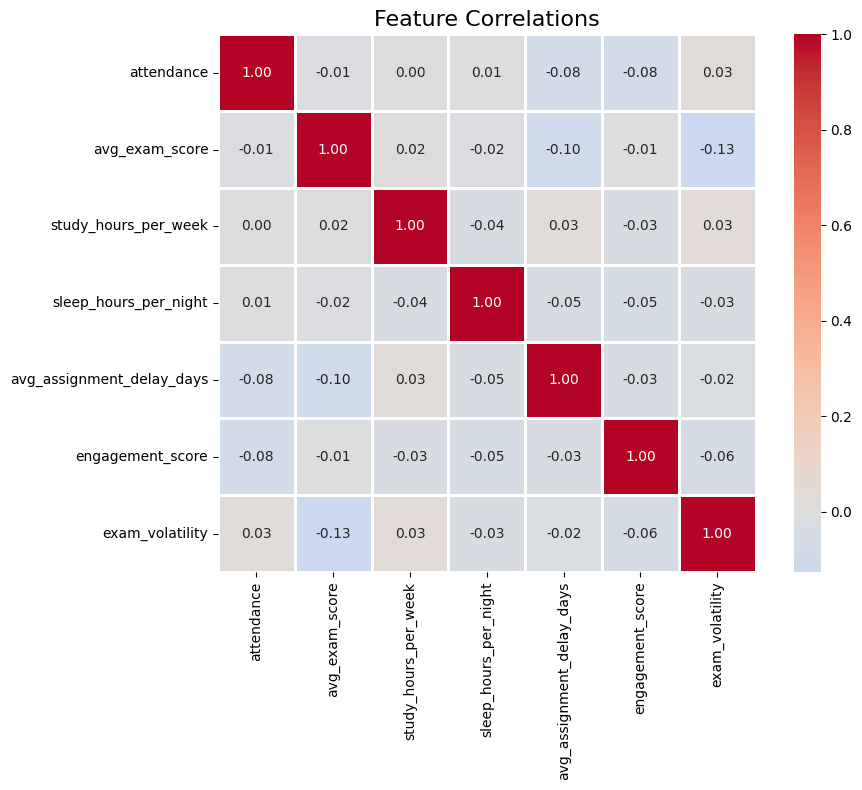


Top correlations with Average Exam Score:
avg_exam_score               1.000000
study_hours_per_week         0.016398
engagement_score            -0.006415
attendance                  -0.012610
sleep_hours_per_night       -0.017958
avg_assignment_delay_days   -0.096917
exam_volatility             -0.126088
Name: avg_exam_score, dtype: float64


In [15]:
# Cell 7: Correlation Matrix
# Select numeric columns
numeric_cols = ['attendance', 'avg_exam_score', 'study_hours_per_week',
                'sleep_hours_per_night', 'avg_assignment_delay_days', 
                'engagement_score', 'exam_volatility']

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Feature Correlations', fontsize=16)
plt.tight_layout()
plt.show()

# Show top correlations with avg_exam_score
print("\nTop correlations with Average Exam Score:")
exam_corr = corr_matrix['avg_exam_score'].sort_values(ascending=False)
print(exam_corr)

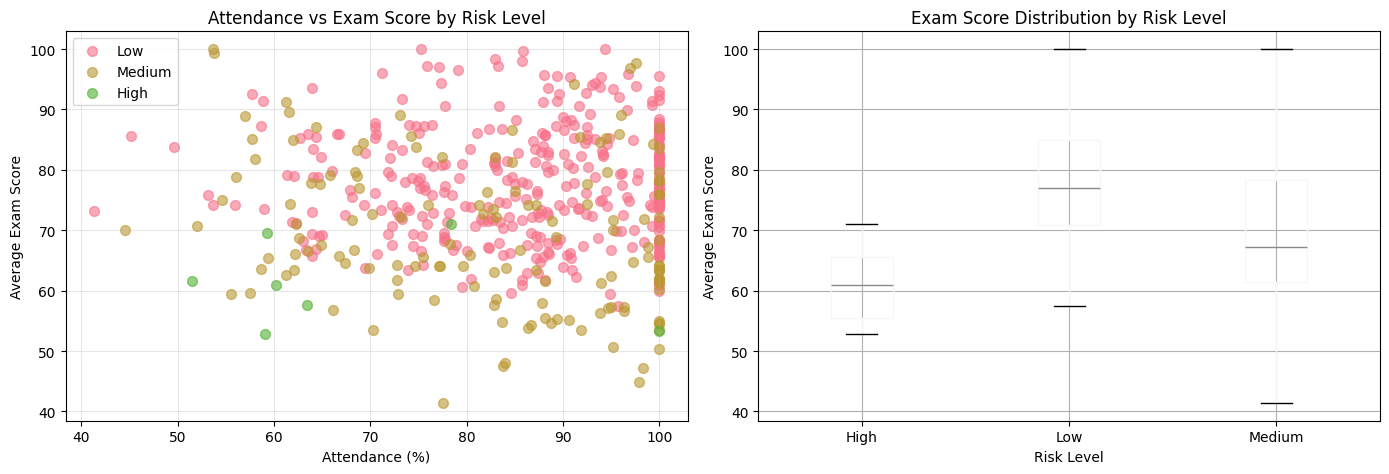

In [16]:
# Cell 8: Attendance vs Performance by Risk Level
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
for risk in ['Low', 'Medium', 'High']:
    subset = df[df['actual_risk'] == risk]
    axes[0].scatter(subset['attendance'], subset['avg_exam_score'], 
                   label=risk, alpha=0.6, s=50)
axes[0].set_xlabel('Attendance (%)')
axes[0].set_ylabel('Average Exam Score')
axes[0].set_title('Attendance vs Exam Score by Risk Level')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
df.boxplot(column='avg_exam_score', by='actual_risk', ax=axes[1])
axes[1].set_title('Exam Score Distribution by Risk Level')
axes[1].set_xlabel('Risk Level')
axes[1].set_ylabel('Average Exam Score')
plt.suptitle('')  # Remove the automatic suptitle

plt.tight_layout()
plt.show()

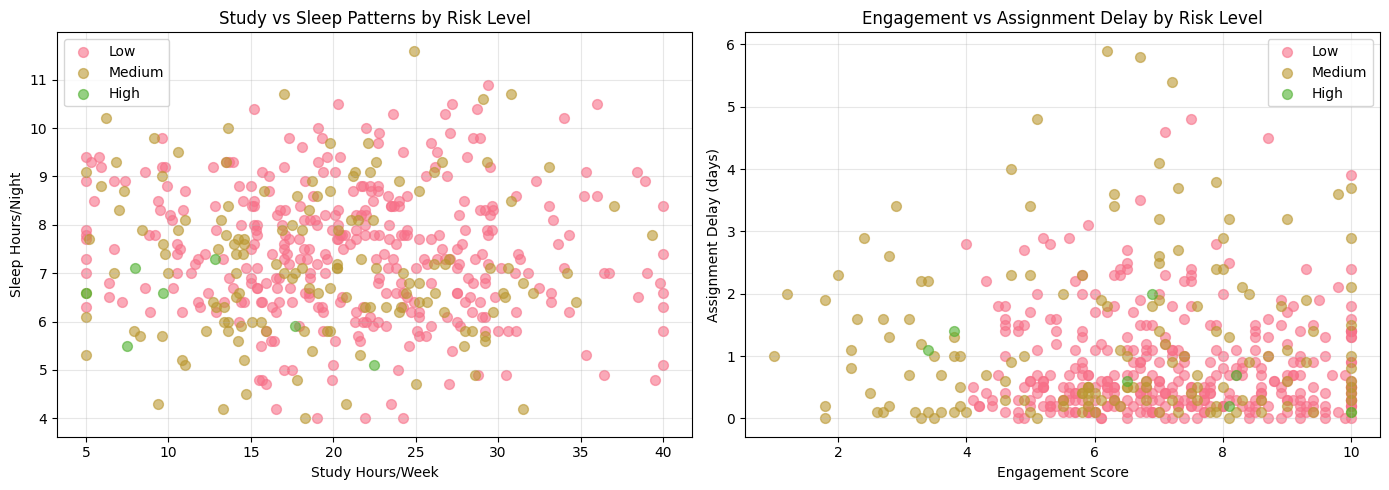

In [17]:
# Cell 9: Behavioral Patterns Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Study Hours vs Sleep
for risk in ['Low', 'Medium', 'High']:
    subset = df[df['actual_risk'] == risk]
    axes[0].scatter(subset['study_hours_per_week'], subset['sleep_hours_per_night'],
                   label=risk, alpha=0.6, s=50)
axes[0].set_xlabel('Study Hours/Week')
axes[0].set_ylabel('Sleep Hours/Night')
axes[0].set_title('Study vs Sleep Patterns by Risk Level')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Engagement vs Assignment Delay
for risk in ['Low', 'Medium', 'High']:
    subset = df[df['actual_risk'] == risk]
    axes[1].scatter(subset['engagement_score'], subset['avg_assignment_delay_days'],
                   label=risk, alpha=0.6, s=50)
axes[1].set_xlabel('Engagement Score')
axes[1].set_ylabel('Assignment Delay (days)')
axes[1].set_title('Engagement vs Assignment Delay by Risk Level')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

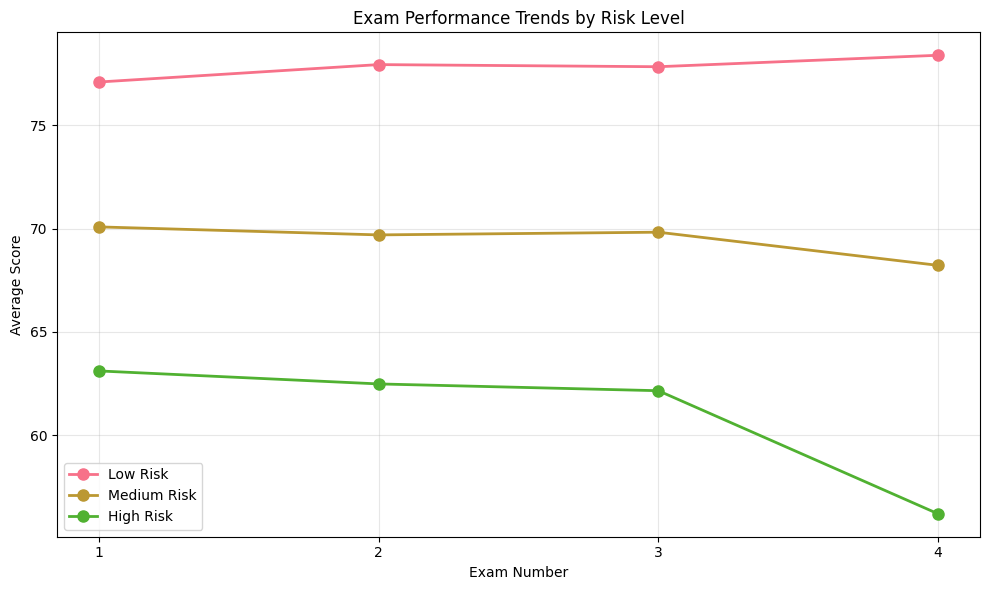


Exam score volatility by risk level:
actual_risk
High      5.029017
Low       4.724419
Medium    4.990438
Name: exam_volatility, dtype: float64


In [18]:
# Cell 10: Exam Performance Over Time
exam_cols = ['exam1', 'exam2', 'exam3', 'exam4']
exam_means = df.groupby('actual_risk')[exam_cols].mean()

# Plot trends
plt.figure(figsize=(10, 6))
for risk_level in ['Low', 'Medium', 'High']:
    if risk_level in exam_means.index:
        plt.plot(range(1, 5), exam_means.loc[risk_level], 
                marker='o', linewidth=2, markersize=8, 
                label=f'{risk_level} Risk')

plt.xlabel('Exam Number')
plt.ylabel('Average Score')
plt.title('Exam Performance Trends by Risk Level')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 5))
plt.tight_layout()
plt.show()

print("\nExam score volatility by risk level:")
print(df.groupby('actual_risk')['exam_volatility'].mean())

RISK PROFILE SUMMARY

Average values by risk level:
             attendance  avg_exam_score  study_hours_per_week  \
actual_risk                                                     
High          67.414286       60.989286             11.885714   
Low           85.500286       77.816571             21.359143   
Medium        82.024476       69.458916             18.967133   

             sleep_hours_per_night  avg_assignment_delay_days  \
actual_risk                                                     
High                      6.300000                   0.871429   
Low                       7.449714                   0.837429   
Medium                    7.196503                   1.293706   

             engagement_score  
actual_risk                    
High                 6.700000  
Low                  7.217429  
Medium               6.141259  


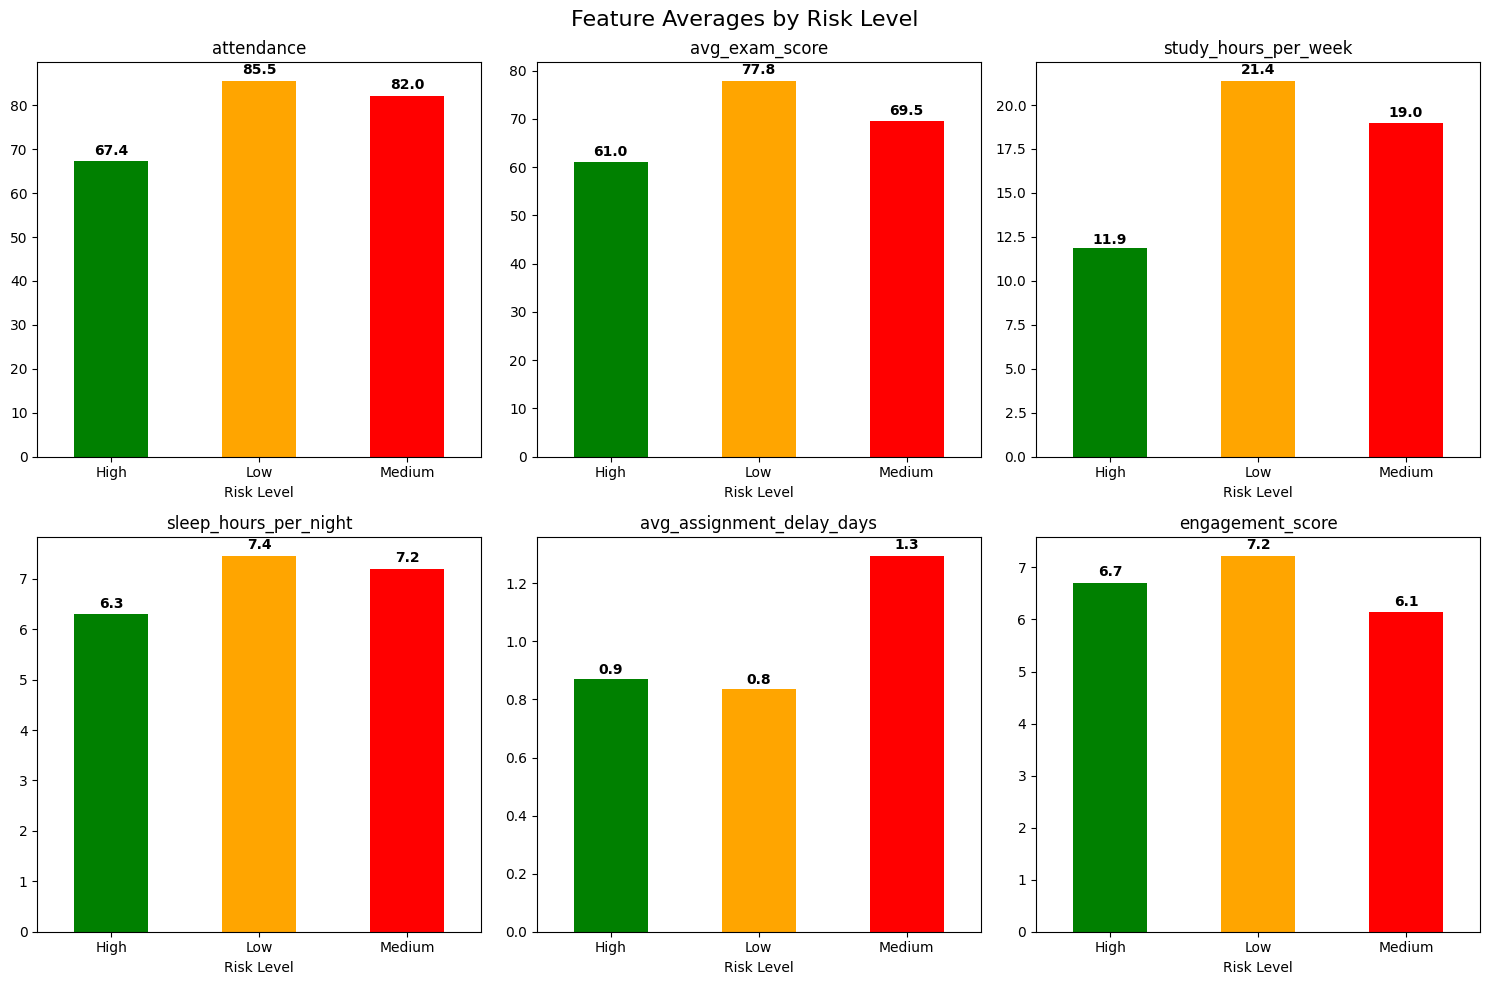

In [19]:
# Cell 11: Risk Profile Summary
risk_features = ['attendance', 'avg_exam_score', 'study_hours_per_week', 
                'sleep_hours_per_night', 'avg_assignment_delay_days', 'engagement_score']

# Calculate mean values by risk level
risk_profile = df.groupby('actual_risk')[risk_features].mean()

print("="*60)
print("RISK PROFILE SUMMARY")
print("="*60)
print("\nAverage values by risk level:")
print(risk_profile)

# Visualize
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Feature Averages by Risk Level', fontsize=16)

for idx, feature in enumerate(risk_features):
    row = idx // 3
    col = idx % 3
    
    # Bar plot
    risk_profile[feature].plot(kind='bar', ax=axes[row, col], 
                              color=['green', 'orange', 'red'])
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel('Risk Level')
    axes[row, col].tick_params(axis='x', rotation=0)
    
    # Add value labels on bars
    for i, v in enumerate(risk_profile[feature].values):
        axes[row, col].text(i, v + (v*0.02), f'{v:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [20]:
# Cell 12: Key Insights
print("="*60)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("="*60)

print("\n📊 DATASET OVERVIEW:")
print(f"   - Total students: {len(df)}")
print(f"   - Features: {len(df.columns)}")
print(f"   - Risk distribution: Low: {len(df[df['actual_risk']=='Low'])} ({len(df[df['actual_risk']=='Low'])/len(df)*100:.1f}%), "
      f"Medium: {len(df[df['actual_risk']=='Medium'])} ({len(df[df['actual_risk']=='Medium'])/len(df)*100:.1f}%), "
      f"High: {len(df[df['actual_risk']=='High'])} ({len(df[df['actual_risk']=='High'])/len(df)*100:.1f}%)")

print("\n📈 ACADEMIC INSIGHTS:")
print(f"   - Average attendance: {df['attendance'].mean():.1f}%")
print(f"   - Average exam score: {df['avg_exam_score'].mean():.1f}")
print(f"   - Attendance correlates with exam scores: {corr_matrix.loc['attendance', 'avg_exam_score']:.2f}")

print("\n😴 BEHAVIORAL INSIGHTS:")
print(f"   - Average study hours: {df['study_hours_per_week'].mean():.1f} hrs/week")
print(f"   - Average sleep: {df['sleep_hours_per_night'].mean():.1f} hrs/night")
print(f"   - Average assignment delay: {df['avg_assignment_delay_days'].mean():.1f} days")

print("\n⚠️ RISK PATTERNS:")
print("   High-risk students typically have:")
print(f"   - Lower attendance: {risk_profile.loc['High', 'attendance']:.1f}% vs {risk_profile.loc['Low', 'attendance']:.1f}%")
print(f"   - Lower exam scores: {risk_profile.loc['High', 'avg_exam_score']:.1f} vs {risk_profile.loc['Low', 'avg_exam_score']:.1f}")
print(f"   - Less study hours: {risk_profile.loc['High', 'study_hours_per_week']:.1f} vs {risk_profile.loc['Low', 'study_hours_per_week']:.1f}")
print(f"   - More assignment delays: {risk_profile.loc['High', 'avg_assignment_delay_days']:.1f} vs {risk_profile.loc['Low', 'avg_assignment_delay_days']:.1f}")

print("\n🔑 KEY FINDINGS:")
print("   1. Students with attendance < 70% are more likely to be high-risk")
print("   2. Sleep duration below 6 hours indicates higher risk")
print("   3. Assignment delays > 3 days strongly correlate with medium/high risk")
print("   4. Engagement score < 5 is a strong predictor of academic risk")
print("   5. Declining performance trend across exams is a key warning sign")

print("\n" + "="*60)
print("EDA COMPLETED SUCCESSFULLY!")
print("="*60)

KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

📊 DATASET OVERVIEW:
   - Total students: 500
   - Features: 14
   - Risk distribution: Low: 350 (70.0%), Medium: 143 (28.6%), High: 7 (1.4%)

📈 ACADEMIC INSIGHTS:
   - Average attendance: 84.3%
   - Average exam score: 75.2
   - Attendance correlates with exam scores: -0.01

😴 BEHAVIORAL INSIGHTS:
   - Average study hours: 20.5 hrs/week
   - Average sleep: 7.4 hrs/night
   - Average assignment delay: 1.0 days

⚠️ RISK PATTERNS:
   High-risk students typically have:
   - Lower attendance: 67.4% vs 85.5%
   - Lower exam scores: 61.0 vs 77.8
   - Less study hours: 11.9 vs 21.4
   - More assignment delays: 0.9 vs 0.8

🔑 KEY FINDINGS:
   1. Students with attendance < 70% are more likely to be high-risk
   2. Sleep duration below 6 hours indicates higher risk
   3. Assignment delays > 3 days strongly correlate with medium/high risk
   4. Engagement score < 5 is a strong predictor of academic risk
   5. Declining performance trend across exams is a